Load the Data


In [ ]:
import pandas as pd

# Load the dataset
data_path = '/content/WineQT.csv'
df = pd.read_csv(data_path)

# Display the first few rows of the dataset
print(df.head())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

Data Preprocessing

In [ ]:
from sklearn.model_selection import train_test_split

# Check for missing values
print(df.isnull().sum())

# Assuming the 'quality' column is the target variable
X = df.drop('quality', axis=1)
y = df['quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training and testing data shapes:", X_train.shape, X_test.shape, y_train.shape, y_test.shape)


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64
Training and testing data shapes: (914, 12) (229, 12) (914,) (229,)


Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Model Training and Evaluation

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

# Stochastic Gradient Descent Classifier
sgd_model = SGDClassifier(random_state=42)
sgd_model.fit(X_train, y_train)
sgd_pred = sgd_model.predict(X_test)
print("SGD Classifier Accuracy:", accuracy_score(y_test, sgd_pred))
print(classification_report(y_test, sgd_pred))

# Support Vector Classifier
svc_model = SVC(random_state=42)
svc_model.fit(X_train, y_train)
svc_pred = svc_model.predict(X_test)
print("SVC Accuracy:", accuracy_score(y_test, svc_pred))
print(classification_report(y_test, svc_pred))


Random Forest Accuracy: 0.6899563318777293
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.73      0.75      0.74        96
           6       0.64      0.71      0.67        99
           7       0.76      0.62      0.68        26
           8       0.00      0.00      0.00         2

    accuracy                           0.69       229
   macro avg       0.43      0.41      0.42       229
weighted avg       0.67      0.69      0.68       229

SGD Classifier Accuracy: 0.5851528384279476
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.68      0.78      0.73        96
           6       0.66      0.39      0.49        99
           7       0.34      0.77      0.47        26
           8       0.00      0.00      0.00         2

    accuracy                           0.59       229
   macro avg       0.34      0.39      0.34 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

Data Visualization

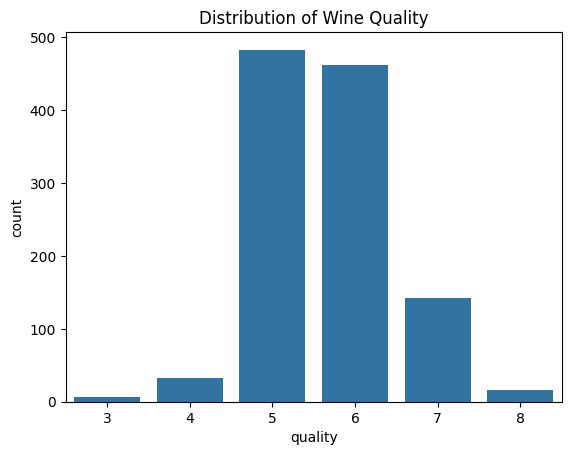

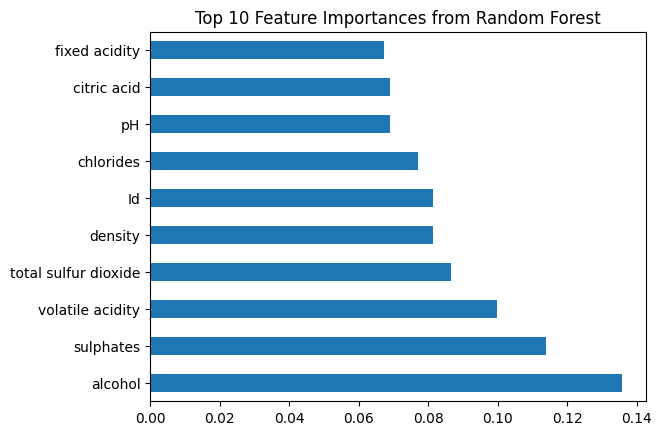

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the distribution of wine quality
sns.countplot(x='quality', data=df)
plt.title('Distribution of Wine Quality')
plt.show()

# Visualize feature importance from the Random Forest model
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances from Random Forest')
plt.show()


Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# Random Forest Hyperparameter Tuning
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, n_jobs=-1, verbose=1)
rf_grid_search.fit(X_train, y_train)
print("Best parameters for Random Forest:", rf_grid_search.best_params_)

# SGD Hyperparameter Tuning
sgd_params = {
    'loss': ['hinge', 'log', 'perceptron'],
    'alpha': [0.0001, 0.001, 0.01],
    'penalty': ['l2', 'l1', 'elasticnet']
}
sgd_grid_search = GridSearchCV(SGDClassifier(random_state=42), sgd_params, cv=5, n_jobs=-1, verbose=1)
sgd_grid_search.fit(X_train, y_train)
print("Best parameters for SGD:", sgd_grid_search.best_params_)

# SVC Hyperparameter Tuning
svc_params = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}
svc_grid_search = GridSearchCV(SVC(random_state=42), svc_params, cv=5, n_jobs=-1, verbose=1)
svc_grid_search.fit(X_train, y_train)
print("Best parameters for SVC:", svc_grid_search.best_params_)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters for Random Forest: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
Fitting 5 folds for each of 27 candidates, totalling 135 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
45 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
19 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

Best parameters for SGD: {'alpha': 0.01, 'loss': 'hinge', 'penalty': 'l2'}
Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best parameters for SVC: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


Retrain Models with Best Hyperparameters

In [ ]:
# Retrain Random Forest with best parameters
best_rf_model = rf_grid_search.best_estimator_
best_rf_pred = best_rf_model.predict(X_test)
print("Tuned Random Forest Accuracy:", accuracy_score(y_test, best_rf_pred))
print(classification_report(y_test, best_rf_pred))

# Retrain SGD with best parameters
sgd_grid_search.fit(X_train, y_train) #Fit the GridSearchCV object first
best_sgd_model = sgd_grid_search.best_estimator_
best_sgd_pred = best_sgd_model.predict(X_test)
print("Tuned SGD Accuracy:", accuracy_score(y_test, best_sgd_pred))
print(classification_report(y_test, best_sgd_pred))

# Retrain SVC with best parameters
svc_grid_search.fit(X_train, y_train) # Fit the GridSearchCV object first
best_svc_model = svc_grid_search.best_estimator_
best_svc_pred = best_svc_model.predict(X_test)
print("Tuned SVC Accuracy:", accuracy_score(y_test, best_svc_pred))
print(classification_report(y_test, best_svc_pred))


Tuned Random Forest Accuracy: 0.6899563318777293
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.73      0.75      0.74        96
           6       0.64      0.71      0.67        99
           7       0.76      0.62      0.68        26
           8       0.00      0.00      0.00         2

    accuracy                           0.69       229
   macro avg       0.43      0.41      0.42       229
weighted avg       0.67      0.69      0.68       229

Fitting 5 folds for each of 27 candidates, totalling 135 fits


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/

Tuned SGD Accuracy: 0.5938864628820961
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.61      0.88      0.72        96
           6       0.56      0.52      0.54        99
           7       1.00      0.04      0.07        26
           8       0.00      0.00      0.00         2

    accuracy                           0.59       229
   macro avg       0.43      0.29      0.27       229
weighted avg       0.61      0.59      0.54       229

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Tuned SVC Accuracy: 0.6593886462882096
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.69      0.75      0.72        96
           6       0.62      0.70      0.66        99
           7       0.71      0.38      0.50        26
           8       0.00      0.00      0.00         2

    accuracy                           0.66  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Feature Engineering

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Retrain the models using the new features
# Random Forest with Polynomial Features
best_rf_model.fit(X_train_poly, y_train)
best_rf_poly_pred = best_rf_model.predict(X_test_poly)
print("Random Forest with Polynomial Features Accuracy:", accuracy_score(y_test, best_rf_poly_pred))

# Continue similarly for SGD and SVC if needed


Random Forest with Polynomial Features Accuracy: 0.6768558951965066


Cross-Validation

In [ ]:
from sklearn.model_selection import cross_val_score

# Cross-validation for the best Random Forest model
rf_cv_scores = cross_val_score(best_rf_model, X, y, cv=10)
print("Random Forest Cross-Validation Scores:", rf_cv_scores)
print("Random Forest Average CV Score:", rf_cv_scores.mean())

# Continue similarly for SGD and SVC


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(


Random Forest Cross-Validation Scores: [0.46086957 0.57391304 0.46956522 0.57017544 0.53508772 0.57894737
 0.57017544 0.52631579 0.52631579 0.57894737]
Random Forest Average CV Score: 0.5390312738367659


Model Comparison

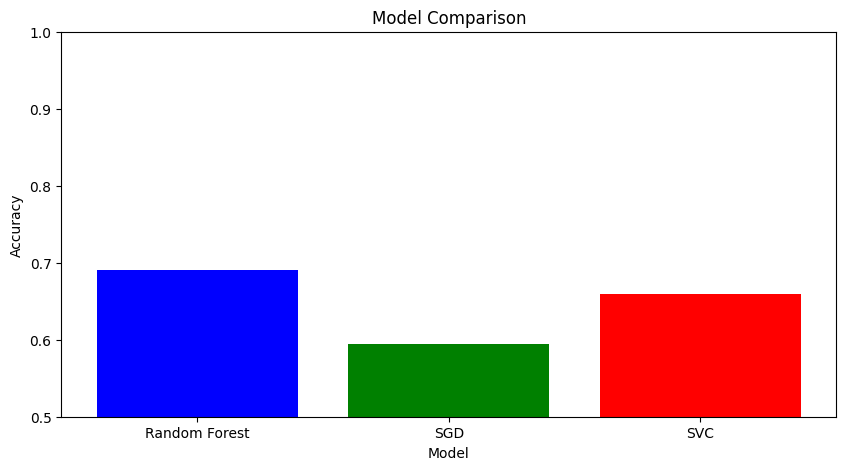

In [ ]:
import matplotlib.pyplot as plt

models = ['Random Forest', 'SGD', 'SVC']
accuracies = [accuracy_score(y_test, best_rf_pred),
              accuracy_score(y_test, best_sgd_pred),
              accuracy_score(y_test, best_svc_pred)]

plt.figure(figsize=(10, 5))
plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.ylim(0.5, 1)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.show()


Saving the model

In [ ]:
import joblib

# Save the best Random Forest model
joblib.dump(best_rf_model, 'best_rf_model.pkl')

# Load the model later using
# loaded_model = joblib.load('best_rf_model.pkl')


['best_rf_model.pkl']